In [851]:
import pandas as pd
import numpy as np
import feature_engine.outliers 
import matplotlib.pyplot as plt
import os
from sklearn.impute import KNNImputer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [1017]:
n = 10000

test_df = pd.DataFrame(dict(a=np.random.normal(loc=10,scale=1,size=n) ))

# Методы предобработки


__Автор__: Ваня П.


## Структура

- Описание метода
- Код
- Тест всех модулей
- Тест в пайплайне
- Микровыводы


# Winsorizer


- Ограничивает выборку по заданному методу и параметрам справа и/или слева, все значения, выходящие за границы, делает равными ограничению, работает только с числовыми переменными

### Код

In [1067]:
class Winsorizer():
    
    def __init__(self, **kwargs):
        self.winsorizer = feature_engine.outliers.Winsorizer(**kwargs)
        
    def fit(self, X, y= None):
        self.winsorizer.fit( X, y= None)
        return self
    
    def transform(self, X):
        
        return self.winsorizer.transform(X)
    
    def get_params(self):
        
        return self.__dict__['winsorizer'].get_params()

    def set_params(self, **kwargs):
        
        self = self.winsorizer.set_params(**kwargs)
            
        return self
    

In [1068]:
wins = Winsorizer(capping_method = 'gaussian',fold = 2)

wins.fit(X_train, y_train)
X_train_t = wins.transform(X_train)


### Проверка методов


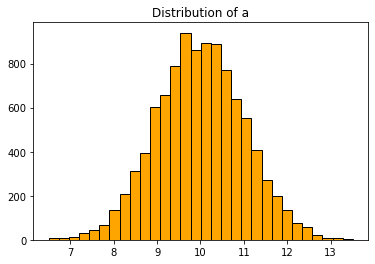

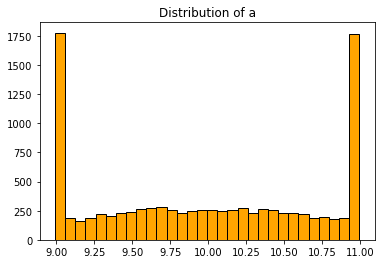

{'capping_method': 'gaussian',
 'fold': 100,
 'missing_values': 'raise',
 'tail': 'both',
 'variables': None}

In [1071]:
wins = Winsorizer(capping_method = 'gaussian', fold = 1, tail = 'both')

wins.fit(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 30)
plt.title(f'Distribution of {col}')
plt.show()

wins.set_params(capping_method = 'gaussian', fold = 100, tail = 'both')
res_df = wins.transform(test_df)

plt.hist(res_df, color='orange', ec='black', bins = 30)
plt.title(f'Distribution of {col}')
plt.show()

wins.get_params()


### Проверка в пайплайне

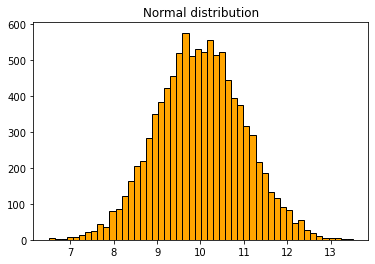

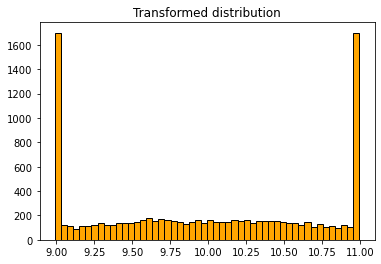

In [1072]:
pipeline_wins = Pipeline(
    [
     ('Winsorizer' , Winsorizer(capping_method = 'gaussian', fold = 1, tail = 'both'))
     ])

pipeline_wins.fit(test_df)

res_df = pipeline_wins.transform(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution')
plt.show()

### Микровыводы
- Игнорирует нечисловые переменные
- Успешно встает в пайплайн
- Позволяет ограничивать выборку разными способами через параметры
- Может быть использовать для обработки выбросов

# Логарифм

Возвращает отлогарифмированный датасет по основанию 10 или exp.

### Код

In [1042]:
import feature_engine.transformation
    
class LogTransformer():
    
    def __init__(self, base = '10'):
        self.LogTransformer = feature_engine.transformation.LogTransformer()
        self.LogTransformer.base = base
        
    def fit(self, X, y= None):
        self.LogTransformer.fit(X, y= None)
        return self

    def transform(self, X):

        return self.LogTransformer.transform(X)
    
    def inverse_transform(self, X):

        return self.LogTransformer.inverse_transform(X)

    def get_params(self):

        return self.__dict__['LogTransformer'].get_params()

    def set_params(self, **kwargs):

        self.LogTransformer.set_params(**kwargs)

        return self

### Проверка методов


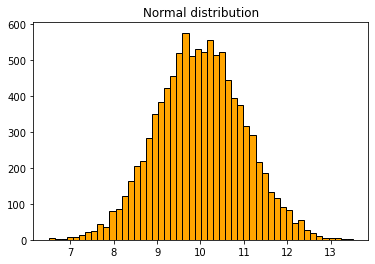

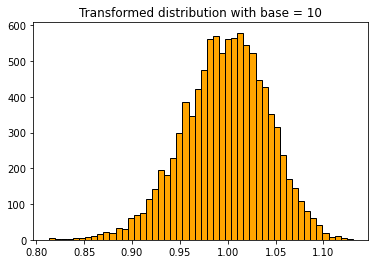

{'base': '10', 'variables': None}


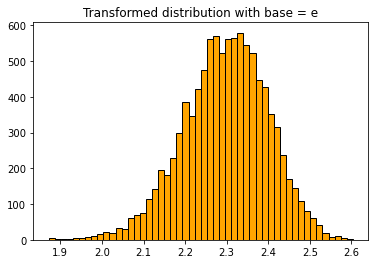

{'base': 'e', 'variables': None}


In [1043]:
obj = LogTransformer()
obj.fit(test_df)
res_df = obj.transform(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution with base = 10')
plt.show()

print(obj.get_params())

obj.set_params(base = 'e')
res_df = obj.transform(test_df)

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution with base = e')
plt.show()

print(obj.get_params())

### Проверка в пайплайне


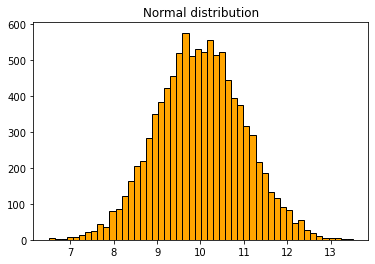

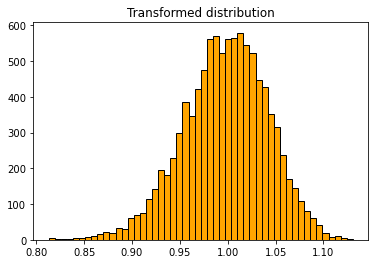

In [1044]:
pipeline_log = Pipeline(
    [
     ('LogTransformer' , LogTransformer())
     ])

pipeline_log.fit(test_df)

res_df = pipeline_log.transform(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution')
plt.show()

### Микровыводы 
- Не принимает на вход выборку с отрицательными значениями
- Принимает только числовые переменные
- Спокойно встает в пайплайн


# Степенное преобразование

Возводит датасет в заданную степень или экспаненту.

### Код

In [1045]:
import feature_engine.transformation
    
class PowerTransformer():
    
    def __init__(self, exp = 0.5):
        self.PowerTransformer = feature_engine.transformation.PowerTransformer()
        self.PowerTransformer.exp = exp
        
    def fit(self, X, y= None):
        self.PowerTransformer.fit(X, y= None)
        return self

    def transform(self, X):

        return self.PowerTransformer.transform(X)
    
    def inverse_transform(self, X):

        return self.PowerTransformer.inverse_transform(X)

    def get_params(self):

        return self.__dict__['PowerTransformer'].get_params()

    def set_params(self, **kwargs):

        self.PowerTransformer.set_params(**kwargs)

        return self

###  Провека методов

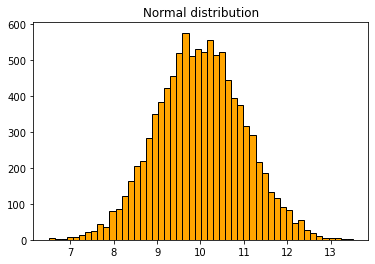

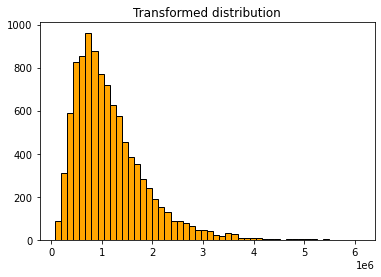

{'exp': 6, 'variables': None}

In [1046]:
obj = PowerTransformer()
obj.set_params(exp = 6)
obj.fit(test_df)
res_df = obj.transform(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution')
plt.show()

obj.get_params()

### Проверка в пайплайне



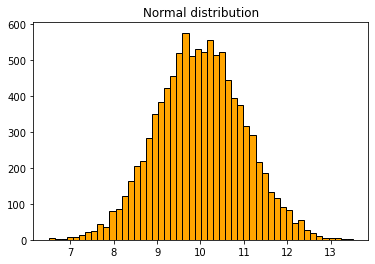

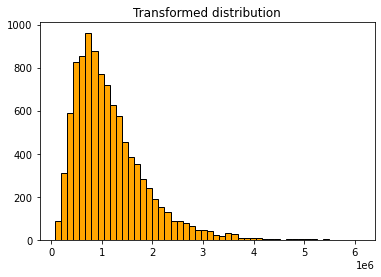

In [1048]:
pipeline_log = Pipeline(
    [
     ('PowerTransformer' , PowerTransformer(exp = 6))
     ])

pipeline_log.fit(test_df)

res_df = pipeline_log.transform(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution')
plt.show()

### Микровыводы

- Не принимает на вход отрицательные значения
- Принимает только числовые переменные
- Успешно встраивается в пайплайн

# BoxCoxTransformer

The BoxCoxTransformer() applies the BoxCox transformation to numerical variables.

The Box-Cox transformation is defined as:

$$T(Y)=\dfrac{Y \exp(λ)−1}{λ} \;\; \text{if} \;\; λ!=0$$

$$log(Y) \;\; \text{otherwise}$$

### Код

In [1049]:
class BoxCoxTransformer():
    
    def __init__(self, exp = 0.5):
        self.BoxCoxTransformer = feature_engine.transformation.BoxCoxTransformer()
        #self.BoxCoxTransformer.exp = exp
        
    def fit(self, X, y= None):
        self.BoxCoxTransformer.fit(X, y= None)
        return self

    def transform(self, X):

        return self.BoxCoxTransformer.transform(X)

    def get_params(self):

        return self.__dict__['BoxCoxTransformer'].get_params()

    def set_params(self, **kwargs):

        self.BoxCoxTransformer.set_params(**kwargs)

        return self
    

### Проверка методов

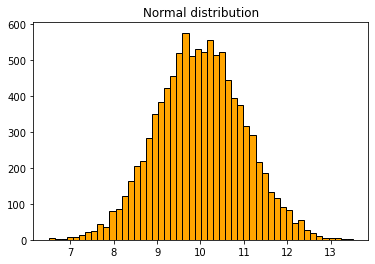

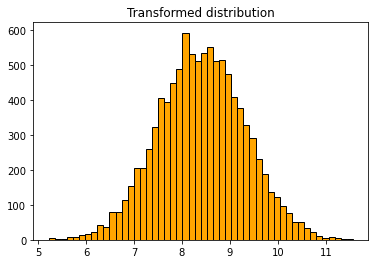

{'variables': None}

In [1050]:
obj = BoxCoxTransformer()
obj.fit(test_df)

res_df = obj.transform(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution')
plt.show()

obj.get_params()


### Проверка в пайплайне

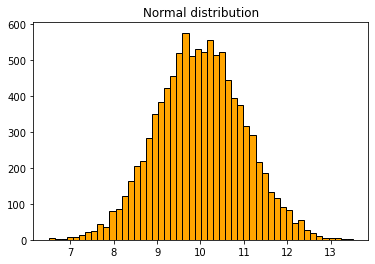

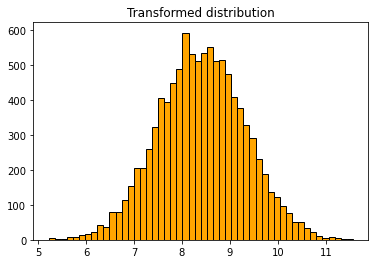

In [1051]:
pipeline_4 = Pipeline(
    [
     ('BoxCoxTransformer' , BoxCoxTransformer())
     ])

pipeline_4.fit(test_df, test_df)
res_df = pipeline_4.transform(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution')
plt.show()


### Микровыводы:
- Успешно встраивается в пайплайн

# YeoJohnsonTransformer

### Код

In [1063]:
class YeoJohnsonTransformer():
    
    
    def __init__(self, exp = 0.5):
        self.YeoJohnsonTransformer = feature_engine.transformation.YeoJohnsonTransformer()
        #self.BoxCoxTransformer.exp = exp
        
    def fit(self, X, y= None):
        self.YeoJohnsonTransformer.fit(X, y= None)
        return self

    def transform(self, X):

        return self.YeoJohnsonTransformer.transform(X)

    def get_params(self):

        return self.__dict__['YeoJohnsonTransformer'].get_params()

    def set_params(self, **kwargs):

        self.YeoJohnsonTransformer.set_params(**kwargs)

        return self


### Проверка методов

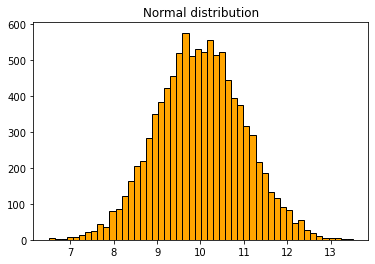

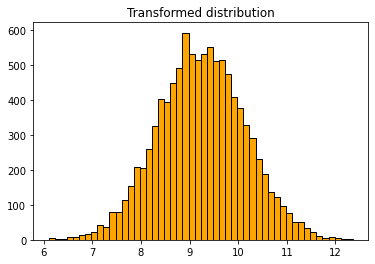

{'variables': None}

In [1064]:
obj = YeoJohnsonTransformer()

obj.fit(test_df)
res_df = obj.transform(test_df)

plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(res_df, color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution')
plt.show()

obj.get_params()

### Проверка в пайплайне

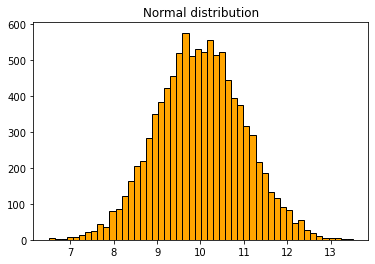

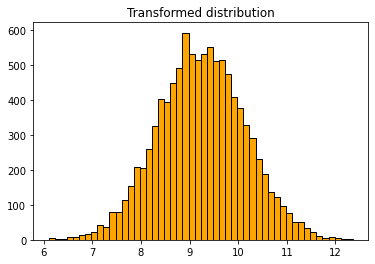

In [1066]:
pipeline_5 = Pipeline(
    [
     ('YeoJohnsonTransformer' , YeoJohnsonTransformer())
     ])

pipeline_5.fit(test_df, test_df)


plt.hist(test_df, color='orange', ec='black', bins = 50)
plt.title(f'Normal distribution')
plt.show()

plt.hist(pipeline_5.transform(test_df), color='orange', ec='black', bins = 50)
plt.title(f'Transformed distribution')
plt.show()

### Микровыводы

- Успешно вставляется в пайплайн

# Выводы

- Модули успешно встраиваются в пайплайн
- Требует проверки